<a href="https://colab.research.google.com/github/Teut0s/machine_learning_bootcamp/blob/main/data/TITANIC_MATEUS_LEANDRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANDO BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/train.csv - train.csv.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,08.05,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


EXPLORAÇÃO DE DADOS

Heatmap

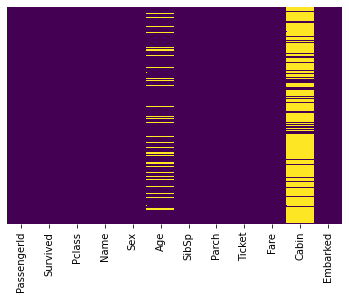

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False , cbar=False, cmap='viridis')

Histograma

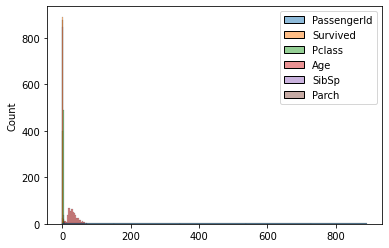

In [ ]:
sns.histplot(df)

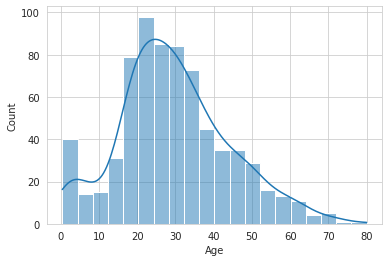

In [ ]:
sns.histplot(data = df, x = "Age", kde = True)


Contagem

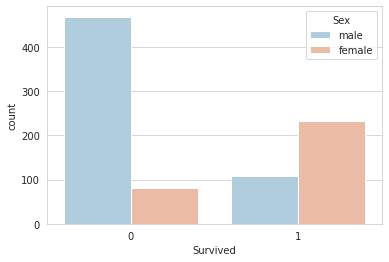

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Sex', data = df, palette = 'RdBu_r')

Boxplot

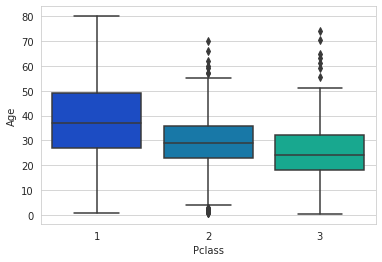

In [ ]:
ax = sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette = 'winter')

REMOVER COLUNAS QUE NÃO AGREGAM VALOR

Retirou cabin(mais nulls)

In [ ]:
df.dropna(axis = 0, how = 'any')
df.drop(columns = ['Cabin'], inplace = True)

In [ ]:
df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [ ]:
df.loc[df.Age.isna() & (df.Pclass == 1), 'Age'] = df[df.Pclass == 1].Age.median()

df.loc[df.Age.isna() & (df.Pclass == 2), 'Age'] = df[df.Pclass == 2].Age.median()

df.loc[df.Age.isna() & (df.Pclass == 3), 'Age'] = df[df.Pclass == 3].Age.median()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


REMOVER COLUNAS QUE N~SO SÃO IMPORTANTES

In [ ]:
#df.drop(columns = ['Name','PassengerId'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 62.8+ KB


In [ ]:
df['Sex'].unique()



array(['male', 'female'], dtype=object)

TROCANDO SEX POR VALOR 0 OU 1

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(['male' , 'female'])
list(le.classes_)
le.transform(['male', 'female'])
list(le.inverse_transform([0, 1]))
print(list(le.classes_), list(le.inverse_transform([0, 1])))



['female', 'male'] ['female', 'male']


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le_df = le.fit_transform(df.Sex)
le_df

le.fit(df.Sex)

df['sex_transformed'] =  le.transform(df.Sex)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              891 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Ticket           891 non-null    object 
 7   Fare             891 non-null    object 
 8   Embarked         889 non-null    object 
 9   sex_transformed  891 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_transformed
0,0,3,male,22.0,1,0,A/5 21171,7.25,S,1
1,1,1,female,38.0,1,0,PC 17599,712.833,C,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,S,0
3,1,1,female,35.0,1,0,113803,53.1,S,0
4,0,3,male,35.0,0,0,373450,08.05,S,1


trocar embarked por 0-1 (get_dummies)

In [ ]:
df_embarked = pd.get_dummies(df['Embarked'], drop_first = True)
df_embarked.head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


CONCATENANDO COLUNA DF_EMBARKED NO DATAFRAME

In [ ]:
df_new = pd.concat([df, df_embarked], axis = 1)
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_transformed,Q,S
0,0,3,male,22.0,1,0,A/5 21171,7.25,S,1,0,1
1,1,1,female,38.0,1,0,PC 17599,712.833,C,0,0,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,S,0,0,1
3,1,1,female,35.0,1,0,113803,53.1,S,0,0,1
4,0,3,male,35.0,0,0,373450,08.05,S,1,0,1
